In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlabel, ylabel, xlim, ylim, title, grid, legend, show
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')
from gaussxw import gaussxwab

## Ejercicio 4.9: la función gamma

La función $\Gamma(x)$ aparece en muchos problemas físicos. Está definida a partir de la integral

$$\Gamma(x)=\int\limits_0^\infty{t^{x-1}\text{e}^{-t}\,\text{d}t}\,.$$

No existe una solución analítica de esta integral, y por tanto, uno debe calcularla para cada valor de $x$ numéricamente. 

1. Escribir un programa que representa el integrando $t^{x-1}\text{e}^{-t}$ en el intervalo $t\in[0,5]$ para $x=2,3$ y $4$. Deberías encontrar que para cada valor de $x$ el integrando empieza en 0, crece hasta llegar a un máximo y luego decrece lentamente. 


2. Mostrar de forma analítica que el máximo del integrando es $t=x-1$.


3. La mayor parte del área bajo el integrando cae cerca de su máximo máximo, por lo que para obtener un valor exacto de la función gamma necesitamos muy bien esta parte de la integral. Para ello podemos cambiar la integral de 0 a $\infty$ a uno sobre un rango finito de 0 a 1 utilizando el cambio de variable que hemos estudiado en la sección 4.2.1. Sin embargo, al hacer esto se tiende a aplastar el pico hacia el borde del rango $[0, 1]$, lo que impide evaluar la integral con precisión. Podemos obtener mejores resultados haciendo un cambio de variables diferente que sitúe el pico en el centro del rango de integración alrededor de $1/2$. Para ello considerar el cambio de variable:

    $$z=\frac{t}{c+t}.$$

    ¿Para que valor de $t$ este cambio de variable nos da $z=1/2$? ¿Cuál es el valor apropiado de c que garantiza que el pico del integrando de la función gamma se encuentre en $z=1/2$?
    
4. Antes de que podamos calcular la función gamma, hay otro detalle que debemos resolver. El integrando $t^{x-1}\text{e}^{-t}$ puede ser difícil de evaluar porque el factor $t^{x-1}$ puede llegar a ser muy grande y el factor $\text{e}^{-t}$ muy pequeño, provocando un overflow o underflow numérico, o ambos casos a la vez para algún valor de $t$. 

    Escribir $t^{x-1} = \text{e}^{(x-1)\log t}$ para obtener una expresión alternativa para el integrando que no sufre estos problemas (o al menos no tanto). Explica por qué tu nueva expresión es mejor que la anterior.


5. Ahora, utilizando el cambio de variables anterior y el valor de $c$ que has elegido, escribe una función definida por el usuario gamma(x) para calcular la función gamma para un argumento arbitrario x.
    Utiliza el método de integración que consideres adecuado. Prueba tu función utilizándola para calcular e imprimir el valor de $\Gamma(3/2)$, que se sabe que es igual a $\sqrt{π}/2 ≃ 0.886$.
   
   
6. Para valores enteros de $x$ se puede demostrar que $\Gamma(x)$ es igual al factorial de $(x - 1)$. Utilice su función de Python para calcular $\Gamma(3)$ , $\Gamma(6)$, y $\Gamma(10)$. Deberías obtener respuestas muy parecidas a a 2! = 2, 5! = 120, y 9! = 362 880.


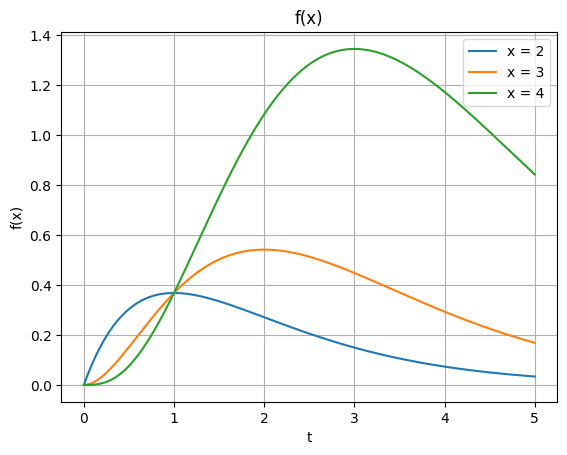

In [12]:
def f(x, t):
    return np.exp((x-1)*np.log(t))*np.exp(-t)

t = np.linspace(0, 5, 1000)
for x in range(2, 5):
    plt.plot(t, f(x, t), label = f"x = {x}")
plt.grid()
plt.title('f(x)')
plt.legend()
plt.xlabel('t')
plt.ylabel("f(x)")
plt.show()

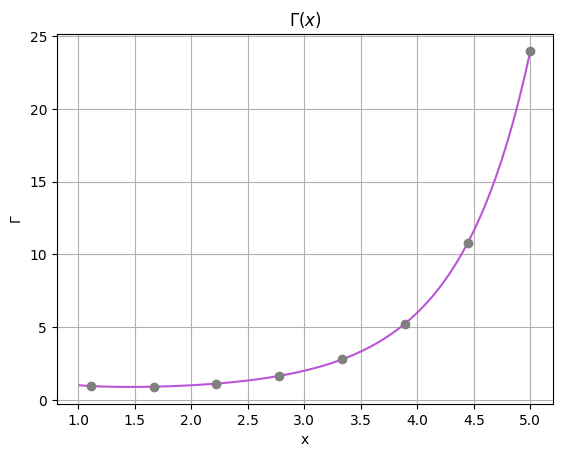

In [13]:
def gamma(x):
    
    def g(n, z):
        c = x - 1
        return f(n, c*z/(1-z))*c/(1-z)**2

    z, w = gaussxwab(50, 0, 1)
    s = 0
    for i in range(len(z)):
        s += w[i]*g(x, z[i])
    return s

x = np.linspace(0, 5, 100)
x2 = np.linspace(0, 5, 10)
y = gamma(x)

plt.plot(x, y, color = 'mediumorchid')
plt.plot(x2, gamma(x2), 'o', color = 'gray')
plt.grid()
plt.title('$\Gamma(x)$')
plt.xlabel('x')
plt.ylabel('$\Gamma$')
plt.show()